In [1]:
import torch
from diffusers import StableDiffusionPanoramaPipeline, DDIMScheduler

model_ckpt = "stabilityai/stable-diffusion-2-base"
scheduler = DDIMScheduler.from_pretrained(model_ckpt, subfolder="scheduler")
pipe = StableDiffusionPanoramaPipeline.from_pretrained(model_ckpt, scheduler=scheduler, torch_dtype=torch.float16)

pipe = pipe.to("cuda")

prompt = "a photo of the dolomites"
image = pipe(prompt).images[0]
image.save("dolomites.png")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/home/ubuntu/anaconda3/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

# Inference

In [3]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
# controlnet_path = "/home/ubuntu/0319_controlnet_sdv1_5/checkpoint-8500/controlnet"
controlnet_path = "lllyasviel/sd-controlnet-canny"

controlnet = ControlNetModel.from_pretrained(controlnet_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
# pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

control_image = load_image("./examples/controlnet/conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

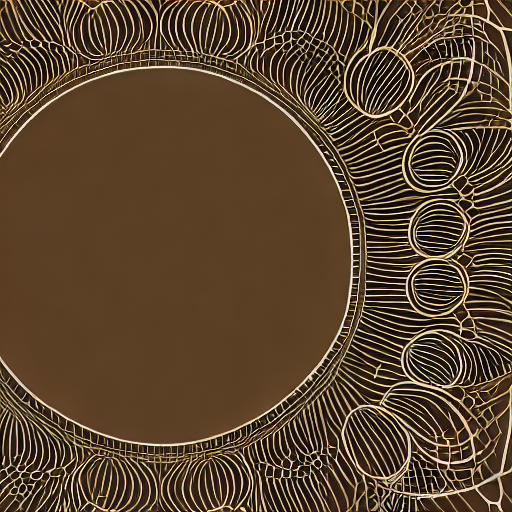

In [5]:
image